In [3]:
# Code was inspired from 
#https://becominghuman.ai/building-an-image-classifier-using-deep-learning-in-python-totally-from-a-beginners-perspective-be8dbaf22dd8
# Convolutional Neural Network

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.utils import to_categorical


# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (128,128, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(64, (3, 3), activation = 'relu'))

#Pooling Layer
classifier.add(MaxPooling2D(pool_size = (2, 2)))

#Adding a third convolution layer
classifier.add(Conv2D(128, (3, 3), activation = 'relu'))

#Pooling Layer
classifier.add(MaxPooling2D(pool_size = (2, 2)))

#Adding a fourth convolution layer
classifier.add(Conv2D(256, (3, 3), activation = 'relu'))

#Pooling Layer
classifier.add(MaxPooling2D(pool_size = (2, 2)))

#Adding a fourth convolution layer
classifier.add(Conv2D(256, (3, 3), activation = 'relu'))


# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units =7, activation = 'softmax'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('dataset/train_dog',
                                                 target_size = (128, 128),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('dataset/test_dog',
                                            target_size = (128,128),
                                            batch_size =32,
                                            class_mode = 'categorical')

history=classifier.fit_generator(training_set,
                         steps_per_epoch = 20,
                         epochs =20,
                         validation_data = test_set,
                         validation_steps = 5)

Found 603 images belonging to 7 classes.
Found 144 images belonging to 7 classes.
Epoch 1/20
20/20 [==============================] - 66s 3s/step - loss: 1.9802 - acc: 0.1496 - val_loss: 1.9453 - val_acc: 0.1458
Epoch 2/20
20/20 [==============================] - 62s 3s/step - loss: 1.9337 - acc: 0.1793 - val_loss: 1.9480 - val_acc: 0.2083
Epoch 3/20
20/20 [==============================] - 60s 3s/step - loss: 1.9065 - acc: 0.2137 - val_loss: 1.8716 - val_acc: 0.1944
Epoch 4/20
20/20 [==============================] - 55s 3s/step - loss: 1.8280 - acc: 0.2533 - val_loss: 1.6925 - val_acc: 0.3264
Epoch 5/20
20/20 [==============================] - 59s 3s/step - loss: 1.7267 - acc: 0.3054 - val_loss: 1.7087 - val_acc: 0.3333
Epoch 6/20
20/20 [==============================] - 360s 18s/step - loss: 1.5525 - acc: 0.3870 - val_loss: 1.6553 - val_acc: 0.3889
Epoch 7/20
20/20 [==============================] - 61s 3s/step - loss: 1.5346 - acc: 0.3975 - val_loss: 1.8442 - val_acc: 0.3403
Epoch 

In [22]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('goldenret.jpg', target_size = (128,128))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
print(training_set.class_indices)
print(result)

{'Golden': 4, 'french-bulldog': 6, 'Dobberman': 2, 'German': 3, 'ShihTzu': 5, 'Beagle': 0, 'Dalmation': 1}
[[0. 0. 0. 0. 1. 0. 0.]]



plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

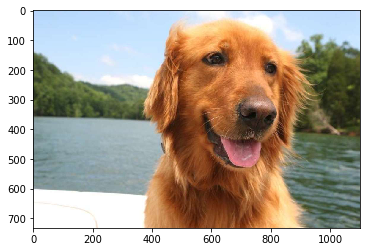

In [23]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image = mpimg.imread("goldenret.jpg")
plt.imshow(image)
plt.show()



In [6]:
classifier.save('Imgclassifier.h5')

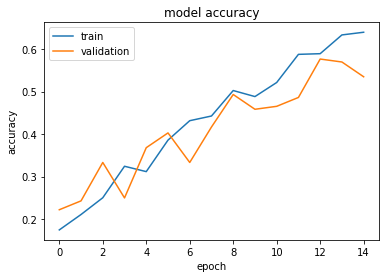

In [5]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

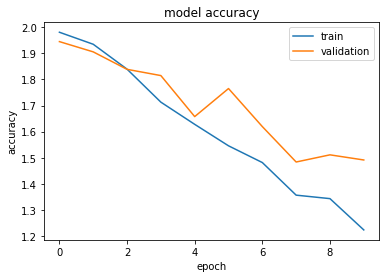

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()from

In [11]:
classifier.save("dogclassify.h5")